In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./Notebooks/Mosaic1000G_Analysis/mosaic_test/")  # Assume we are in Hapsburg Root Directory
#from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..

from load_funcs import Summary_ROH_Calls, Summary_ROH_Calls_Error, statistics_power_df, calc_power, give_SE,\
                       false_power_statistics, return_calls_only, give_bias, false_positive_nrs
from plot_funcs import plot_power, plot_fp_distribution

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0402.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


# Plot power Histograms

# Worst case Power

In [6]:
bl_lens=[2, 4, 6, 8, 10]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI6/", ch=3, nr_iid = 100, 
                        blen_cm = 4, output_prefix = "0999/", output=1)
#roh = Summary_ROH_Calls_Missing(mosaic_folder="./Simulated/1000G_Mosaic/CHB/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "", output=1, missing=0.9)
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 670
Total Nr Simulated: 500
Total Nr Called: 727
Total Nr Simulated: 500
Total Nr Called: 733
Total Nr Simulated: 500
Total Nr Called: 765
Total Nr Simulated: 500
Total Nr Called: 774


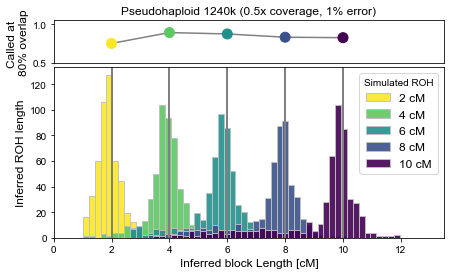

In [3]:
plot_power(bl_lens, df_called, power, title="Pseudohaploid 1240k (0.5x coverage, 1% error)", 
           savepath="", figsize=(7,4), xlim=[0,13.5])

### Gaps merged

In [8]:
bl_lens=[4, 6, 8, 10]
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI6/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "merged/", output=1)
df_fp = roh.collect_fp_df()  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 727
Total Nr Simulated: 500
Total Nr Called: 723
Total Nr Simulated: 500
Total Nr Called: 727
Total Nr Simulated: 500
Total Nr Called: 708


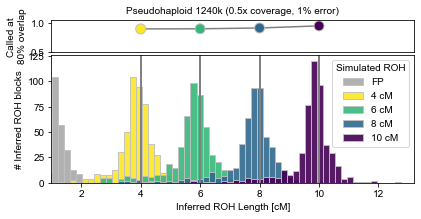

In [9]:
plot_power(bl_lens, df_called, power, df_fp=df_fp,
           title="Pseudohaploid 1240k (0.5x coverage, 1% error)", 
           savepath="./figures/manuscript/histograms/worst_case.pdf", figsize=(6.5,3), 
           xlim=[1,13.2],
            ec="silver", color_fp="darkgray", fs_l=10, fs=10)

# Best case Power

In [5]:
bl_lens=[2, 4, 6, 8, 10]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI5/", ch=3, nr_iid = 100, 
                        blen_cm = 4, output_prefix = "0999/", output=1)
#roh = Summary_ROH_Calls_Missing(mosaic_folder="./Simulated/1000G_Mosaic/CHB/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "", output=1, missing=0.9)
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 673
Total Nr Simulated: 500
Total Nr Called: 661
Total Nr Simulated: 500
Total Nr Called: 641
Total Nr Simulated: 500
Total Nr Called: 668
Total Nr Simulated: 500
Total Nr Called: 659


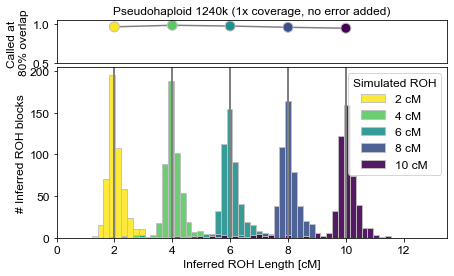

In [6]:
plot_power(bl_lens, df_called, power, title="Pseudohaploid 1240k (1x coverage, no error added)", 
           savepath="", figsize=(7,4), xlim=[0,13.5])

### With Block Merging

In [10]:
bl_lens=[4, 6, 8, 10]
roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/TSI5/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "merged/", output=1)
df_fp = roh.collect_fp_df()  # Call FPs
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 500
Total Nr Called: 660
Total Nr Simulated: 500
Total Nr Called: 635
Total Nr Simulated: 500
Total Nr Called: 653
Total Nr Simulated: 500
Total Nr Called: 633


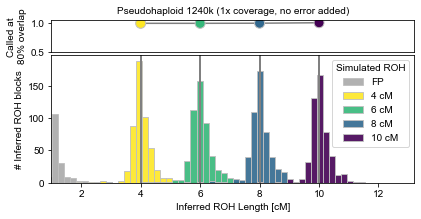

In [12]:
plot_power(bl_lens, df_called, power, df_fp=df_fp,
           title="Pseudohaploid 1240k (1x coverage, no error added)", 
           savepath="./figures/manuscript/histograms/best_case.pdf", figsize=(6.5,3), 
           xlim=[1,13.2], ec="silver", color_fp="darkgray", fs_l=10, fs=10)